<a href="https://colab.research.google.com/github/Sahanya42/Diabetes-Prediction-ML-Model/blob/main/Diabetes_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Collect & Explore Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()  # A "Choose File" button will appear

loading the diabetes dataset to a pandas DataFrame

In [ ]:
import pandas as pd

# Load dataset
diabetes_dataset = pd.read_csv('/content/diabetes.csv')
print("\n")
# Display first 5 rows
print("\nFirst 5 rows:\n")
print(diabetes_dataset.head())
print("\n")

# Dataset info
print("\nDataset Info:\n")
print(diabetes_dataset.info())
print("\n")

# Statistical summary
print("\nStatistical Summary:")
print(diabetes_dataset.describe())
print("\n")


Check class distribution

In [ ]:
print(diabetes_dataset['Outcome'].value_counts())


#Data Preprocessing (Cleaning)

Handle zeros in impossible features and outliers

In [ ]:
import numpy as np

# Features where zero is impossible
cols_zero_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with median
for col in cols_zero_check:
    median_value = diabetes_dataset[col].median()
    diabetes_dataset[col] = diabetes_dataset[col].replace(0, median_value)

# Cap extreme outliers using 1st and 99th percentiles
for col in diabetes_dataset.columns[:-1]:
    lower = diabetes_dataset[col].quantile(0.01)
    upper = diabetes_dataset[col].quantile(0.99)
    diabetes_dataset[col] = diabetes_dataset[col].clip(lower, upper)


#Exploratory Data Analysis (EDA)


Visualize feature distributions, outliers, and correlations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
diabetes_dataset.hist(bins=20, figsize=(12,8))
plt.suptitle("Feature Distributions")
plt.show()

# Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=diabetes_dataset)
plt.xticks(rotation=90)
plt.title("Boxplots of Features")
plt.show()

# Scatterplot example
plt.figure(figsize=(8,6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=diabetes_dataset, alpha=0.7)
plt.title("Glucose vs. BMI by Outcome")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


#Split Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_dataset.drop(columns='Outcome')
Y = diabetes_dataset['Outcome']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=2
)

# Standardize features: fit on training data only
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # fit and transform on training data
X_test = scaler.transform(X_test)        # only transform on test data

#Choose ML Algorithm

Import and define Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000, class_weight='balanced')  # class_weight balances the classes


In [ ]:
classifier.fit(X_train, Y_train)

#Evaluate the Model

Accuracy, Precision, Recall, F1-score, Confusion Matrix

Training Accuracy: 0.772093023255814
Test Accuracy: 0.7962962962962963

Test Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       144
           1       0.68      0.74      0.71        72

    accuracy                           0.80       216
   macro avg       0.77      0.78      0.78       216
weighted avg       0.80      0.80      0.80       216



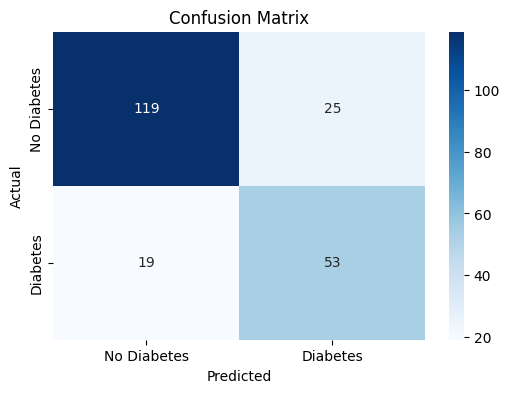

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)

# Metrics
print("Training Accuracy:", accuracy_score(Y_train, Y_train_pred))
print("Test Accuracy:", accuracy_score(Y_test, Y_test_pred))
print("\nTest Classification Report:\n", classification_report(Y_test, Y_test_pred))

# Confusion matrix heatmap
cm = confusion_matrix(Y_test, Y_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#Make a Predictive System

In [ ]:
# Example input data
input_data = (5,166,72,19,175,25.8,0.587,51)
input_data_np = np.asarray(input_data).reshape(1,-1)
input_data_std = scaler.transform(input_data_np)

prediction = classifier.predict(input_data_std)
if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')


The person is diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
